In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/FOUNDATION/train.csv')


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [30]:
Y_train

array([5, 5, 6, ..., 8, 9, 9])

In [31]:
def init_params():
    W1 = np.random.rand(64, 784) - 0.5
    b1 = np.random.rand(64, 1) - 0.5
    W2 = np.random.rand(10, 64) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3


In [32]:
def compute_loss(A3, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    log_probs = -np.log(A3[one_hot_Y.astype(bool)])
    loss = np.sum(log_probs) / m
    return loss

In [33]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    losses = []
    accuracies = []
    for i in range(iterations):
        # Forward propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)

        # Compute loss
        loss = compute_loss(A3, Y)
        losses.append(loss)

        # Compute accuracy
        predictions = get_predictions(A3)
        accuracy = get_accuracy(predictions, Y)
        accuracies.append(accuracy)

        # Backward propagation
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)

        # Update parameters
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        # Print progress every 10 iterations
        if i % 10 == 0:
            print(f"Iteration: {i}, Loss: {loss}, Accuracy: {accuracy}")

    return W1, b1, W2, b2, W3, b3, losses, accuracies

In [34]:
W1, b1, W2, b2, W3, b3, losses_extended, accuracies_extended = gradient_descent(X_train, Y_train, 0.10, 500)

[4 4 4 ... 4 4 4] [5 5 6 ... 8 9 9]
Iteration: 0, Loss: 6.113082515966233, Accuracy: 0.10885365853658537
[0 8 0 ... 0 6 8] [5 5 6 ... 8 9 9]
[0 8 5 ... 0 6 8] [5 5 6 ... 8 9 9]
[8 8 3 ... 0 0 8] [5 5 6 ... 8 9 9]
[8 8 3 ... 0 0 8] [5 5 6 ... 8 9 9]
[8 8 0 ... 0 0 8] [5 5 6 ... 8 9 9]
[8 8 0 ... 0 0 8] [5 5 6 ... 8 9 9]
[8 8 0 ... 0 0 8] [5 5 6 ... 8 9 9]
[8 8 0 ... 0 0 8] [5 5 6 ... 8 9 9]
[8 8 0 ... 0 0 8] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 0 8] [5 5 6 ... 8 9 9]
Iteration: 10, Loss: 2.1654930286141245, Accuracy: 0.20778048780487804
[8 8 2 ... 0 0 8] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 0 8] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 8 8] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 8 8] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 8 8] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 8 4] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 8 4] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 8 4] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 8 4] [5 5 6 ... 8 9 9]
[8 8 2 ... 0 8 4] [5 5 6 ... 8 9 9]
Iteration: 20, Loss: 1.9338947001491964, Accuracy: 0.3211707317073171
[8 4 2 ... 0 8 4] [5 5 6 ... 8 9 9

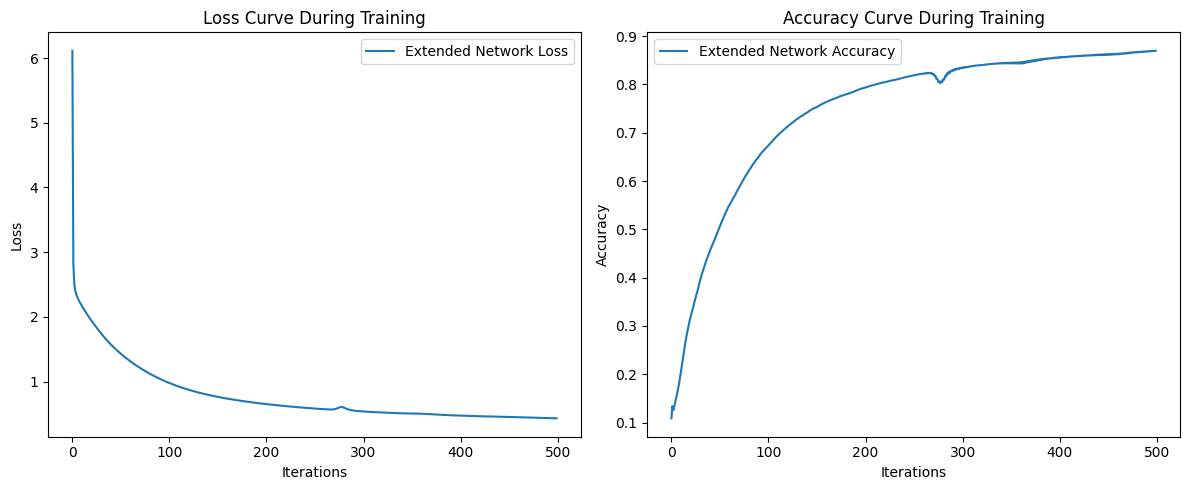

In [35]:
 #Loss curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_extended, label="Extended Network Loss")
plt.title("Loss Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracies_extended, label="Extended Network Accuracy")
plt.title("Accuracy Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [5]
Label:  5


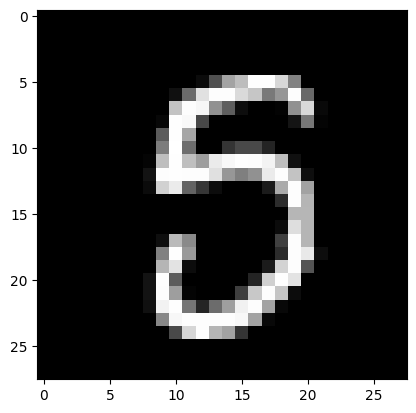

Prediction:  [4]
Label:  5


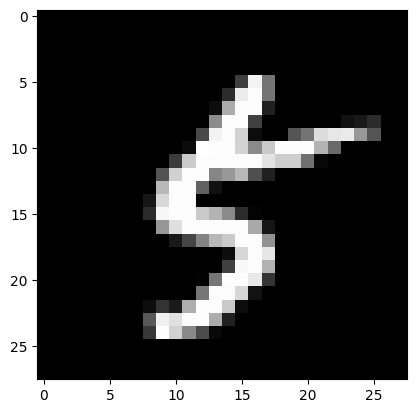

Prediction:  [6]
Label:  6


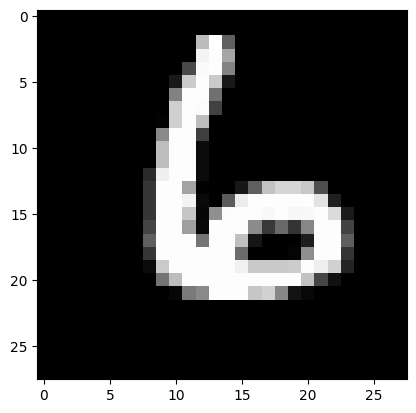

Prediction:  [2]
Label:  2


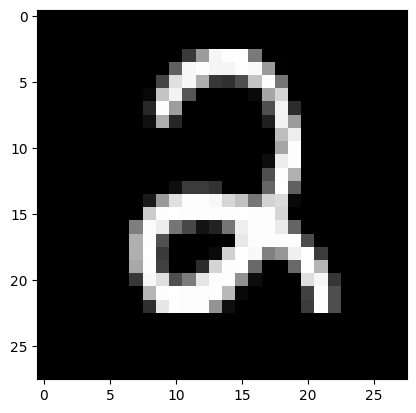

In [37]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)


In [38]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)


[0 9 7 5 3 0 5 5 3 0 0 1 6 7 1 4 2 0 0 1 6 1 7 2 9 8 1 4 1 3 3 4 9 0 1 2 6
 6 4 7 3 2 5 0 7 8 6 3 1 4 7 9 5 7 1 2 6 0 2 9 7 6 6 7 4 8 1 7 7 0 2 7 9 0
 6 0 8 6 6 0 7 9 3 2 8 8 9 5 5 8 6 1 5 5 2 6 3 3 9 5 3 0 9 8 5 9 5 9 1 2 9
 6 0 3 3 7 4 1 6 5 4 0 2 6 2 8 8 0 7 1 1 0 6 7 8 9 7 5 3 8 3 9 0 9 7 4 7 8
 6 8 2 7 7 6 2 9 3 7 5 8 2 4 0 2 4 9 4 3 0 4 2 4 4 6 2 6 3 4 0 9 9 8 2 2 7
 4 8 3 7 6 3 7 4 5 2 4 2 7 5 9 6 7 9 7 5 2 8 0 5 2 3 8 9 3 0 3 5 0 7 0 0 8
 6 3 2 4 7 0 8 8 6 1 1 4 1 6 5 6 1 5 9 2 0 5 1 3 7 7 1 9 3 9 4 3 8 1 6 0 0
 1 0 3 4 3 1 7 0 0 3 9 2 1 1 8 3 0 7 4 4 5 7 9 3 7 6 8 9 9 0 7 6 1 2 8 8 2
 9 2 5 0 8 4 0 1 6 5 3 8 8 3 4 9 3 5 7 5 1 7 2 9 6 6 9 5 7 4 5 7 9 6 7 4 1
 9 3 2 9 3 3 8 2 7 6 7 2 8 4 0 5 8 6 5 3 0 8 4 8 9 5 8 4 9 8 1 9 8 0 7 7 4
 1 2 8 7 5 1 3 8 5 4 5 5 0 3 4 4 1 6 0 4 1 1 7 8 3 1 4 4 0 6 2 1 8 2 8 6 5
 0 4 1 6 9 6 6 6 4 0 7 6 6 3 8 6 3 3 1 6 6 7 2 0 1 3 1 1 7 5 0 6 9 0 3 8 7
 8 2 2 9 2 6 2 0 5 7 8 2 7 3 6 3 7 9 2 8 7 1 6 1 6 6 4 1 5 7 5 9 1 2 2 7 8
 9 7 2 2 1 6 4 0 5 5 6 9 

0.865